## Problema 4 - Nuestras líneas aéreas le aseguran el máximo confort, a veces

#### Marc Nebot Moyano

#### Librerías necesarias

In [455]:
from apafib import load_sentiment
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import numpy as np

#### Apartado a)

##### Separación de datos

In [456]:
sentiment_data_500 = load_sentiment(500)
sentiment_data_1500 = load_sentiment(1500)
sentiment_data_3000 = load_sentiment(3000)

X_train_500 = sentiment_data_500[0]
y_train_500 = sentiment_data_500[1]
X_val_500 = sentiment_data_500[2]
y_val_500 = sentiment_data_500[3]
X_test_500 = sentiment_data_500[4]
y_test_500 = sentiment_data_500[5]


X_train_1500 = sentiment_data_1500[0]
y_train_1500 = sentiment_data_1500[1]
X_val_1500 = sentiment_data_1500[2]
y_val_1500 = sentiment_data_1500[3]
X_test_1500 = sentiment_data_1500[4]
y_test_1500 = sentiment_data_1500[5]

X_train_3000 = sentiment_data_3000[0]
y_train_3000 = sentiment_data_3000[1]
X_val_3000 = sentiment_data_3000[2]
y_val_3000 = sentiment_data_3000[3]
X_test_3000 = sentiment_data_3000[4]
y_test_3000 = sentiment_data_3000[5]


Con esto soy capaz de observar que solo tenemos dos clases, la 0 y la 1

In [457]:
np.unique(y_train_500)

array([0, 1], dtype=int64)

##### Visualización de datos

d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


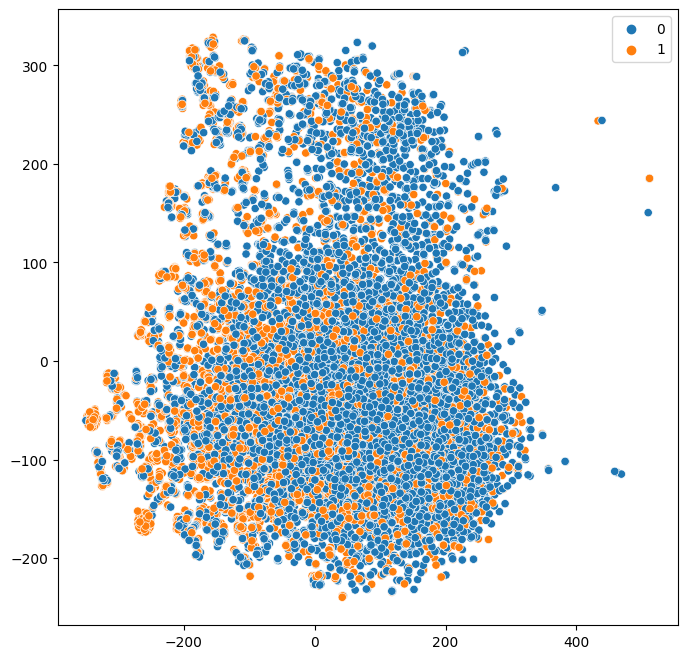

In [458]:
X_trans = TSNE(n_components=2, perplexity=10,n_iter=2000, init='pca').fit_transform(X_train_500)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_500);

d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


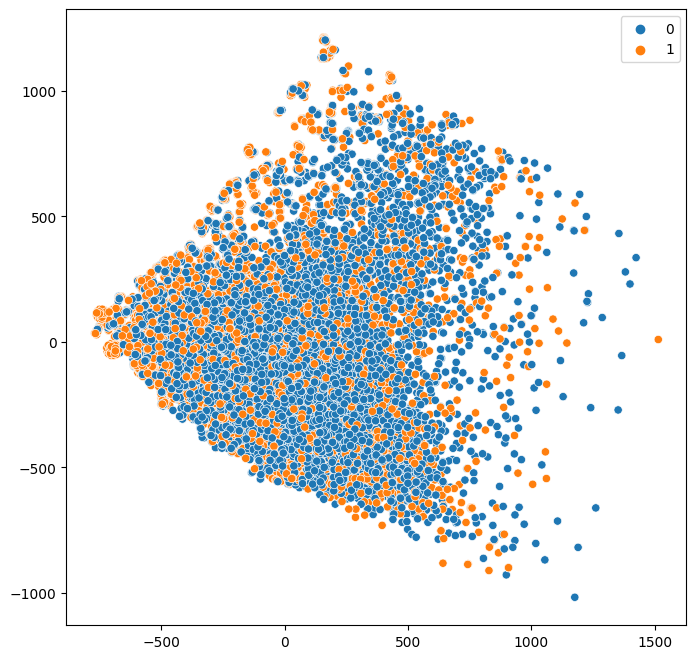

In [459]:
X_trans = TSNE(n_components=2, perplexity=10,n_iter=2000, init='pca').fit_transform(X_train_1500)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_1500);

d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Programas\Python3.10.7\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


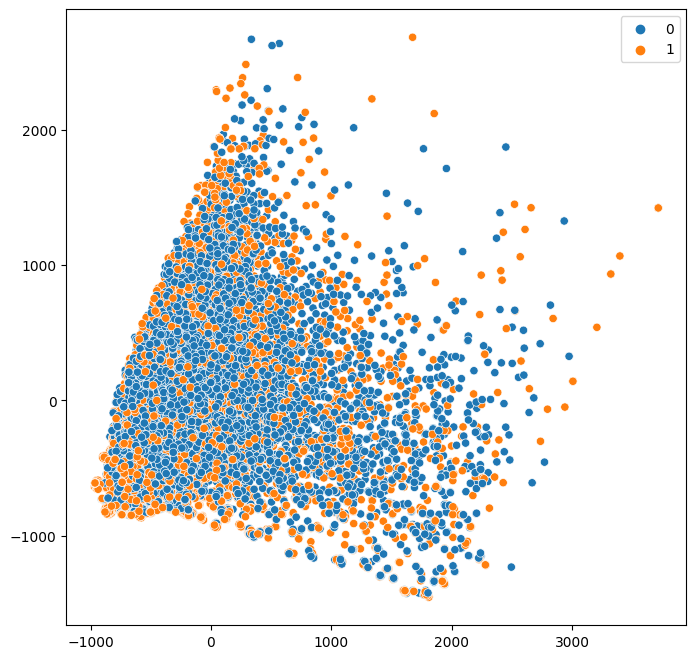

In [460]:
X_trans = TSNE(n_components=2, perplexity=10,n_iter=2000, init='pca').fit_transform(X_train_3000)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train_3000);

En las gráficas podemos observar que es bastante difícil observar a qué clase pertenece cada uno ya que están todas bastante juntas y no facilitan para nada una clara distinción

#### Apartado b)

##### Creación de modelos para cada conjunto

In [461]:
def create_models(nw, train, embeddings):
    models = []
    for dims in embeddings:
        print("Creando modelo ", nw, " con", dims, " dimensiones")
        model = keras.Sequential() 
        model.add(keras.layers.Embedding(input_dim=nw + 1, output_dim=dims, input_length=train.shape[1]))
        model.add(keras.layers.Dense(128, activation='relu'))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(1, activation='sigmoid'))
        models.append(model)
    return models

models_500 = create_models(500,X_train_500, [5,10,15,20,25,30])
models_1500 = create_models(1500,X_train_1500, [5,10,15,20,25,30])
models_3000 = create_models(3000,X_train_3000, [5,10,15,20,25,30])

Creando modelo  500  con 5  dimensiones
Creando modelo  500  con 10  dimensiones
Creando modelo  500  con 15  dimensiones
Creando modelo  500  con 20  dimensiones
Creando modelo  500  con 25  dimensiones
Creando modelo  500  con 30  dimensiones
Creando modelo  1500  con 5  dimensiones
Creando modelo  1500  con 10  dimensiones
Creando modelo  1500  con 15  dimensiones
Creando modelo  1500  con 20  dimensiones
Creando modelo  1500  con 25  dimensiones
Creando modelo  1500  con 30  dimensiones
Creando modelo  3000  con 5  dimensiones
Creando modelo  3000  con 10  dimensiones
Creando modelo  3000  con 15  dimensiones
Creando modelo  3000  con 20  dimensiones
Creando modelo  3000  con 25  dimensiones
Creando modelo  3000  con 30  dimensiones


##### Entrenamiento de modelos

In [462]:
ckpt = keras.callbacks.ModelCheckpoint('modelckpt', monitor='val_loss', save_best_only=True, save_weights_only=True)

def train_model(models, x_train, y_train, x_val, y_val, patiences):
    res = []
    for model,pat in zip(models,patiences):
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat)
        r = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_val, y_val), verbose=1, callbacks=[early, ckpt])
        res.append(r)
    return res

results_val_500 = train_model(models_500, X_train_500, y_train_500, X_val_500, y_val_500, patiences=[10,10,10,10,10,10])
results_val_1500 = train_model(models_1500, X_train_1500, y_train_1500, X_val_1500, y_val_1500, patiences=[10,10,10,10,10,10])
results_val_3000 = train_model(models_3000, X_train_3000, y_train_3000, X_val_3000, y_val_3000, patiences=[10,10,10,10,10,10])

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.6711 - acc: 0.6019 - val_loss: 0.6294 - val_acc: 0.6573
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6337 - acc: 0.6145 - val_loss: 0.5686 - val_acc: 0.7136
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5696 - acc: 0.7029 - val_loss: 0.5193 - val_acc: 0.7527
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5150 - acc: 0.7454 - val_loss: 0.4817 - val_acc: 0.7699
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4680 - acc: 0.7765 - val_loss: 0.4577 - val_acc: 0.7809
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4356 - acc: 0.8008 - val_loss: 0.4464 - val_acc: 0.7898
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4153 - acc: 0.8121 - val_loss: 0.4377 - val_acc: 0.8001
Epoch 8/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4007 - acc: 

##### Efectos de la dimensión del embedding para la validación

Seguidamente veremos lo aciertos y el efecto del embedding en el conjunto de validación para cada conjunto

In [463]:
i = 5
accuracyVal500 = []
for model in models_500:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_val_500, y_val_500)
    accuracyVal500.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 956us/step - loss: 0.4368 - acc: 0.8104
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 979us/step - loss: 0.4334 - acc: 0.8125
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4370 - acc: 0.8098
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4430 - acc: 0.8056
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4436 - acc: 0.8049
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4407 - acc: 0.8077


In [464]:
i = 5
accuracyVal1500 = []
for model in models_1500:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_val_1500, y_val_1500)
    accuracyVal1500.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 912us/step - loss: 0.4156 - acc: 0.8260
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 979us/step - loss: 0.4457 - acc: 0.8171
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4530 - acc: 0.8158
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4513 - acc: 0.8075
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4763 - acc: 0.8199
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4755 - acc: 0.8103


In [465]:
i = 5
accuracyVal3000 = []
for model in models_3000:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_val_3000, y_val_3000)
    accuracyVal3000.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 934us/step - loss: 0.4524 - acc: 0.8275
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4748 - acc: 0.8179
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.5017 - acc: 0.8125
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.5086 - acc: 0.8159
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.5235 - acc: 0.8090
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.5198 - acc: 0.8186


##### Efectos de la dimensión del embedding para el test

Seguidamente veremos los aciertos y el efecto del embedding en el conjunto de test para cada conjunto

In [466]:
i = 5
accuracyTest500 = []
for model in models_500:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_test_500, y_test_500)
    accuracyTest500.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 890us/step - loss: 0.3535 - acc: 0.8291
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 956us/step - loss: 0.3496 - acc: 0.8318
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3429 - acc: 0.8408
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3460 - acc: 0.8318
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3518 - acc: 0.8291
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3492 - acc: 0.8346


In [467]:
i = 5
accuracyTest1500 = []
for model in models_1500:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_test_1500, y_test_1500)
    accuracyTest1500.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 934us/step - loss: 0.3461 - acc: 0.8494
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 979us/step - loss: 0.3774 - acc: 0.8330
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3791 - acc: 0.8371
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3961 - acc: 0.8234
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3809 - acc: 0.8426
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.3858 - acc: 0.8419


In [468]:
i = 5
accuracyTest3000 = []
for model in models_3000:
    print("Resultado con ", i, " output dimensiones en la capa de embedding: ")
    loss, acc = model.evaluate(X_test_3000, y_test_3000)
    accuracyTest3000.append(acc)
    i = i + 5

Resultado con  5  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 934us/step - loss: 0.3860 - acc: 0.8434
Resultado con  10  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 956us/step - loss: 0.4061 - acc: 0.8427
Resultado con  15  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4364 - acc: 0.8331
Resultado con  20  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4376 - acc: 0.8358
Resultado con  25  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4602 - acc: 0.8317
Resultado con  30  output dimensiones en la capa de embedding: 
46/46 [==============================] - 0s 1ms/step - loss: 0.4347 - acc: 0.8399


##### Resultados dimensiones de embedding

In [469]:
def comparar_dimensiones():
    resultsAccVal = []
    resultsAccTest = []
    for i in range(6):
        resultsAccVal.append((accuracyVal500[i] + accuracyVal1500[i] + accuracyVal3000[i])/3)
        resultsAccTest.append((accuracyTest500[i] + accuracyTest1500[i] + accuracyTest3000[i])/3)

    dim = 5
    for res in resultsAccVal:
        print('Accuracy media conjunto VALIDACIÓN para dimensión ' , dim, ' : ', res)
        dim = dim + 5

    dim = 5
    for res2 in resultsAccTest:
        print('Accuracy media conjunto de TEST para dimensión ' , dim, ' : ', res2)
        dim = dim + 5

    maxTest = max(resultsAccTest)
    maxVal = max(resultsAccVal)


    resultsTot = []
    for x in range(6):
        resultsTot.append((resultsAccVal[x] + resultsAccTest[x])/2)
    
    maxMax = max(resultsTot)
    print("Por lo tanto la mejor dimensión para el conjunto de VALIDACIÓN es ", (resultsAccVal.index(maxVal)*5 + 5), "con un score medio de ",  maxVal)
    print("Para el conjunto de TEST es ", (resultsAccTest.index(maxTest)*5 + 5), "con un score medio de ",  maxTest)
    print("Y finalmente la mejor dimensión es ", (resultsTot.index(maxMax)*5 + 5), "con un score medio de ",  maxMax)
    return (resultsTot.index(maxMax)*5 + 5)


In [470]:
best_dim = comparar_dimensiones()
best_dim

Accuracy media conjunto VALIDACIÓN para dimensión  5  :  0.8213274677594503
Accuracy media conjunto VALIDACIÓN para dimensión  10  :  0.8158520658810934
Accuracy media conjunto VALIDACIÓN para dimensión  15  :  0.812654455502828
Accuracy media conjunto VALIDACIÓN para dimensión  20  :  0.8096818725268046
Accuracy media conjunto VALIDACIÓN para dimensión  25  :  0.8112809856732687
Accuracy media conjunto VALIDACIÓN para dimensión  30  :  0.8121945460637411
Accuracy media conjunto de TEST para dimensión  5  :  0.8406281272570292
Accuracy media conjunto de TEST para dimensión  10  :  0.8358395298322042
Accuracy media conjunto de TEST para dimensión  15  :  0.8369906346003214
Accuracy media conjunto de TEST para dimensión  20  :  0.8303653796513876
Accuracy media conjunto de TEST para dimensión  25  :  0.8344706098238627
Accuracy media conjunto de TEST para dimensión  30  :  0.8388086756070455
Por lo tanto la mejor dimensión para el conjunto de VALIDACIÓN es  5 con un score medio de  0.821

5

#### Apartado c)

In [471]:
models_500_pat = create_models(500,X_train_500, embeddings=np.repeat(best_dim,4))
models_1500_pat = create_models(1500,X_train_1500, embeddings=np.repeat(best_dim,4))
models_3000_pat = create_models(3000,X_train_3000, embeddings=np.repeat(best_dim,4))

Creando modelo  500  con 5  dimensiones
Creando modelo  500  con 5  dimensiones
Creando modelo  500  con 5  dimensiones
Creando modelo  500  con 5  dimensiones
Creando modelo  1500  con 5  dimensiones
Creando modelo  1500  con 5  dimensiones
Creando modelo  1500  con 5  dimensiones
Creando modelo  1500  con 5  dimensiones
Creando modelo  3000  con 5  dimensiones
Creando modelo  3000  con 5  dimensiones
Creando modelo  3000  con 5  dimensiones
Creando modelo  3000  con 5  dimensiones


In [472]:
results_val_500_pat = train_model(models_500_pat, X_train_500, y_train_500, X_val_500, y_val_500, patiences=[5,10,15,20])
results_val_1500_pat = train_model(models_1500_pat, X_train_1500, y_train_1500, X_val_1500, y_val_1500, patiences=[5,10,15,20])
results_val_3000_pat = train_model(models_3000_pat, X_train_3000, y_train_3000, X_val_3000, y_val_3000, patiences=[5,10,15,20])

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.6730 - acc: 0.6014 - val_loss: 0.6320 - val_acc: 0.6573
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6331 - acc: 0.6201 - val_loss: 0.5645 - val_acc: 0.7328
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5688 - acc: 0.7074 - val_loss: 0.5167 - val_acc: 0.7493
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5159 - acc: 0.7461 - val_loss: 0.4828 - val_acc: 0.7713
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4675 - acc: 0.7773 - val_loss: 0.4618 - val_acc: 0.7761
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4364 - acc: 0.8008 - val_loss: 0.4452 - val_acc: 0.7898
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4152 - acc: 0.8128 - val_loss: 0.4378 - val_acc: 0.7988
Epoch 8/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4025 - acc

##### Efectos de la paciencia para la validación

In [473]:
i = 5
accuracyVal500_pat = []
for model in models_500:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_val_500, y_val_500)
    accuracyVal500_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 934us/step - loss: 0.4368 - acc: 0.8104
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4334 - acc: 0.8125
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4370 - acc: 0.8098
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4430 - acc: 0.8056
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4436 - acc: 0.8049
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4407 - acc: 0.8077


In [474]:
i = 5
accuracyVal1500_pat = []
for model in models_1500:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_val_1500, y_val_1500)
    accuracyVal1500_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 924us/step - loss: 0.4156 - acc: 0.8260
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 956us/step - loss: 0.4457 - acc: 0.8171
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4530 - acc: 0.8158
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4513 - acc: 0.8075
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4763 - acc: 0.8199
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4755 - acc: 0.8103


In [475]:
i = 5
accuracyVal3000_pat = []
for model in models_3000:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_val_3000, y_val_3000)
    accuracyVal3000_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 912us/step - loss: 0.4524 - acc: 0.8275
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4748 - acc: 0.8179
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.5017 - acc: 0.8125
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.5086 - acc: 0.8159
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.5235 - acc: 0.8090
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.5198 - acc: 0.8186


##### Efectos de la paciencia para el test

In [476]:
i = 5
accuracyTest500_pat = []
for model in models_500:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_test_500, y_test_500)
    accuracyTest500_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 867us/step - loss: 0.3535 - acc: 0.8291
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 933us/step - loss: 0.3496 - acc: 0.8318
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3429 - acc: 0.8408
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3460 - acc: 0.8318
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3518 - acc: 0.8291
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3492 - acc: 0.8346


In [477]:
i = 5
accuracyTest1500_pat = []
for model in models_1500:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_test_1500, y_test_1500)
    accuracyTest1500_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 934us/step - loss: 0.3461 - acc: 0.8494
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 979us/step - loss: 0.3774 - acc: 0.8330
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3791 - acc: 0.8371
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3961 - acc: 0.8234
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3809 - acc: 0.8426
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.3858 - acc: 0.8419


In [478]:
i = 5
accuracyTest3000_pat = []
for model in models_3000:
    print("Resultado con una paciencia de ", i, ": ")
    loss, acc = model.evaluate(X_test_3000, y_test_3000)
    accuracyTest3000_pat.append(acc)
    i = i + 5

Resultado con una paciencia de  5 : 
46/46 [==============================] - 0s 934us/step - loss: 0.3860 - acc: 0.8434
Resultado con una paciencia de  10 : 
46/46 [==============================] - 0s 979us/step - loss: 0.4061 - acc: 0.8427
Resultado con una paciencia de  15 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4364 - acc: 0.8331
Resultado con una paciencia de  20 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4376 - acc: 0.8358
Resultado con una paciencia de  25 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4602 - acc: 0.8317
Resultado con una paciencia de  30 : 
46/46 [==============================] - 0s 1ms/step - loss: 0.4347 - acc: 0.8399


##### Resultados paciencias

In [479]:
def comparar_paciencias():
    resultsAccVal = []
    resultsAccTest = []
    for i in range(4):
        resultsAccVal.append((accuracyVal500_pat[i] + accuracyVal1500_pat[i] + accuracyVal3000_pat[i])/3)
        resultsAccTest.append((accuracyTest500_pat[i] + accuracyTest1500_pat[i] + accuracyTest3000_pat[i])/3)

    pat = 5
    for res in resultsAccVal:
        print('Accuracy media conjunto VALIDACIÓN para paciencia ' , pat, ' : ', res)
        pat = pat + 5

    pat = 5
    for res2 in resultsAccTest:
        print('Accuracy media conjunto de TEST para paciencia ' , pat, ' : ', res2)
        pat = pat + 5

    maxTest = max(resultsAccTest)
    maxVal = max(resultsAccVal)


    resultsTot = []
    for x in range(4):
        resultsTot.append((resultsAccVal[x] + resultsAccTest[x])/2)
    
    maxMax = max(resultsTot)
    print("Por lo tanto la mejor paciencia para el conjunto de VALIDACIÓN es ", (resultsAccVal.index(maxVal)*5 + 5), "con un score medio de ",  maxVal)
    print("Para el conjunto de TEST es ", (resultsAccTest.index(maxTest)*5 + 5), "con un score medio de ",  maxTest)
    print("Y finalmente la mejor paciencia para es ", (resultsTot.index(maxMax)*5 + 5), "con un score medio de ",  maxMax)
    return maxMax


He podido comprobar que dependiendo de la ejecución la mejor paciencia varia pero tienden a ser las mismas, entre 5 y 15

In [480]:
best_pat = comparar_paciencias()

Accuracy media conjunto VALIDACIÓN para paciencia  5  :  0.8213274677594503
Accuracy media conjunto VALIDACIÓN para paciencia  10  :  0.8158520658810934
Accuracy media conjunto VALIDACIÓN para paciencia  15  :  0.812654455502828
Accuracy media conjunto VALIDACIÓN para paciencia  20  :  0.8096818725268046
Accuracy media conjunto de TEST para paciencia  5  :  0.8406281272570292
Accuracy media conjunto de TEST para paciencia  10  :  0.8358395298322042
Accuracy media conjunto de TEST para paciencia  15  :  0.8369906346003214
Accuracy media conjunto de TEST para paciencia  20  :  0.8303653796513876
Por lo tanto la mejor paciencia para el conjunto de VALIDACIÓN es  5 con un score medio de  0.8213274677594503
Para el conjunto de TEST es  5 con un score medio de  0.8406281272570292
Y finalmente la mejor paciencia para es  5 con un score medio de  0.8309777975082397


#### Apartado d)

##### Creación de modelos

In [481]:
def create_models_v2(nw, train, embeddings, denseLayers):   
    models = []
    id = 1
    for dims,layers in zip(embeddings, denseLayers):
        dL = 128
        model = keras.Sequential() 
        model.add(keras.layers.Embedding(input_dim=nw + 1, output_dim=dims, input_length=train.shape[1]))
        for i in range(layers):
            print("Creando modelo ", id, "de ", nw, " palabras y con Dense Layer de ", dL, " dimensiones")
            model.add(keras.layers.Dense(dL, activation='relu'))
            dL = dL/2
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(1, activation='sigmoid'))
        models.append(model)
        id = id + 1
    return models

In [482]:
models_500_cap = create_models_v2(500,X_train_500, embeddings=np.repeat(best_dim,4),denseLayers=[1,2,3,4])
models_1500_cap = create_models_v2(1500,X_train_1500, embeddings=np.repeat(best_dim,4),denseLayers=[1,2,3,4])
models_3000_cap = create_models_v2(3000,X_train_3000, embeddings=np.repeat(best_dim,4),denseLayers=[1,2,3,4])

Creando modelo  1 de  500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  2 de  500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  2 de  500  palabras y con Dense Layer de  64.0  dimensiones
Creando modelo  3 de  500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  3 de  500  palabras y con Dense Layer de  64.0  dimensiones
Creando modelo  3 de  500  palabras y con Dense Layer de  32.0  dimensiones
Creando modelo  4 de  500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  4 de  500  palabras y con Dense Layer de  64.0  dimensiones
Creando modelo  4 de  500  palabras y con Dense Layer de  32.0  dimensiones
Creando modelo  4 de  500  palabras y con Dense Layer de  16.0  dimensiones
Creando modelo  1 de  1500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  2 de  1500  palabras y con Dense Layer de  128  dimensiones
Creando modelo  2 de  1500  palabras y con Dense Layer de  64.0  dimensiones
Creando modelo 

##### Entrenamiento de modelos

In [483]:
results_val_500_cap = train_model(models_500_cap, X_train_500, y_train_500, X_val_500, y_val_500, patiences=np.repeat(best_pat,4))
results_val_1500_cap = train_model(models_1500_cap, X_train_1500, y_train_1500, X_val_1500, y_val_1500, patiences=np.repeat(best_pat,4))
results_val_3000_cap = train_model(models_3000_cap, X_train_3000, y_train_3000, X_val_3000, y_val_3000, patiences=np.repeat(best_pat,4))

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.6751 - acc: 0.5980 - val_loss: 0.6328 - val_acc: 0.6573
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.6313 - acc: 0.6137 - val_loss: 0.5654 - val_acc: 0.7109
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5619 - acc: 0.7118 - val_loss: 0.5096 - val_acc: 0.7637
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5026 - acc: 0.7529 - val_loss: 0.4748 - val_acc: 0.7706
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4580 - acc: 0.7845 - val_loss: 0.4570 - val_acc: 0.7809
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4284 - acc: 0.8035 - val_loss: 0.4428 - val_acc: 0.7919
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4097 - acc: 0.8145 - val_loss: 0.4397 - val_acc: 0.7967
Epoch 8/50
23/23 [==============================] - 0s 10ms/step - loss: 0.3967 - ac

##### Búsqueda del mejor modelo dentro del conjunto

In [484]:
def find_best_model(models, results, X_val,y_val):
  best_score = 0
  result = None
  index = 0
  for i, model in enumerate(models):
    loss, score = model.evaluate(X_val, y_val)
    if score > best_score:
      best_score = score
      result = results[i]
      index = i
  return best_score, result, i

##### Resultados conjunto 500 palabras

46/46 [==============================] - 0s 2ms/step - loss: 0.4485 - acc: 0.7823
El mejor modelo con 500 palabras tiene  3  capas y una puntuación de  0.8145604133605957


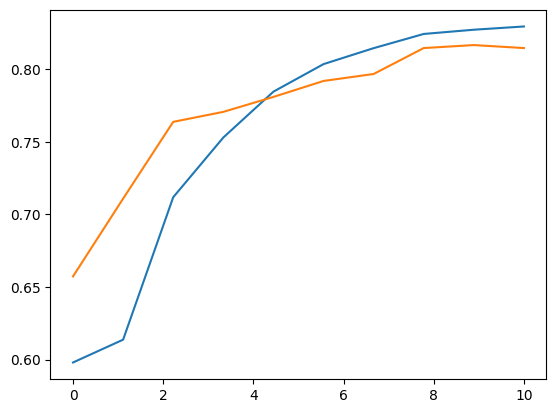

In [485]:
scores, results, i = find_best_model(models_500_cap, results_val_500_cap, X_val_500,y_val_500)

x = np.linspace(0,len(results.history['acc']),len(results.history['acc']))
plt.plot(x,results.history['acc'])
plt.plot(x,results.history['val_acc'])

print('El mejor modelo con 500 palabras tiene ', i, " capas y una puntuación de ", scores)

##### Resultados conjunto 1500 palabras

46/46 [==============================] - 0s 2ms/step - loss: 0.4124 - acc: 0.8164
El mejor modelo con 1500 palabras tiene  3  capas y una puntuación de  0.8246575593948364


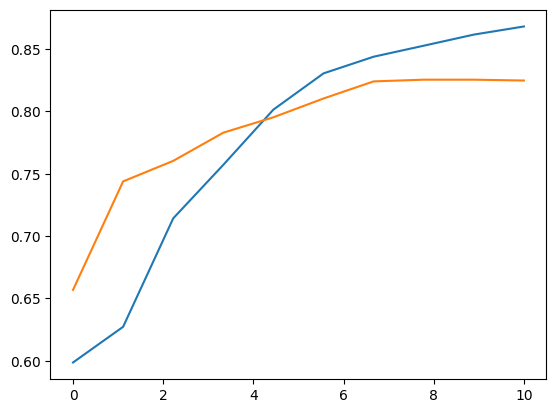

In [486]:
scores, results, i = find_best_model(models_1500_cap, results_val_1500_cap, X_val_1500,y_val_1500)

x = np.linspace(0,len(results.history['acc']),len(results.history['acc']))
plt.plot(x,results.history['acc'])
plt.plot(x,results.history['val_acc'])

print('El mejor modelo con 1500 palabras tiene ', i, " capas y una puntuación de ", scores)

##### Resultados conjunto 3000 palabras

46/46 [==============================] - 0s 2ms/step - loss: 0.4291 - acc: 0.8056
El mejor modelo con 3000 palabras tiene  3  capas y una puntuación de  0.8281998634338379


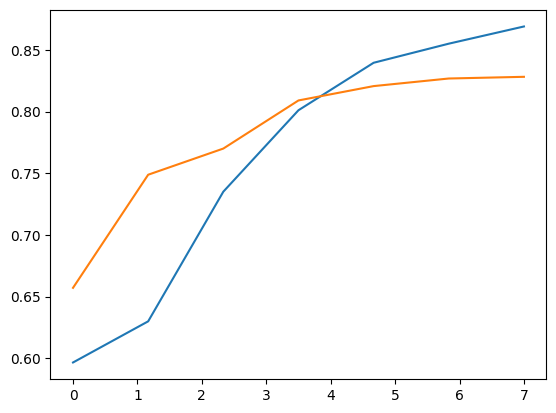

In [487]:
scores, results, i = find_best_model(models_3000_cap, results_val_3000_cap, X_val_3000,y_val_3000)

x = np.linspace(0,len(results.history['acc']),len(results.history['acc']))
plt.plot(x,results.history['acc'])
plt.plot(x,results.history['val_acc'])

print('El mejor modelo con 3000 palabras tiene ', i, " capas y una puntuación de ", scores)

##### Conclusiones

Después de la reejecución de esta práctica durante varias veces y ver qué valores escoger, he podido observar que depende mucho de cómo se entrene el modelo aunque la mayoría de veces entre [5,10] dimensiones con una paciencia de entre [5, 10] funcionará bastante bien sin necesidad de llegar a una paciencia de 20, y pondría entre 2 y 3 capas densas ya que no es necesario abusar de más capas ya que con estas tenemos suficiente.